In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("/content/UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
x =data .drop('LIMIT_BAL', axis=1)
y = data [['default.payment.next.month']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
svm = SVC()
svm.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
svm_pred = svm.predict(x_test)
clf_report_svm = pd.DataFrame(classification_report(y_test, svm_pred, output_dict=True))
clf_report_svm

,0,1,accuracy,macro avg,weighted avg
precision,0.777864,1.0000,0.777889,0.888932,0.827228
recall,1.000000,0.0005,0.777889,0.500250,0.777889
f1-score,0.875055,0.0010,0.777889,0.438027,0.680820
support,7000.000000,2000.0000,0.777889,9000.000000,9000.000000


In [ ]:
print(confusion_matrix(y_test, svm_pred))

[[7000    0]
 [1999    1]]


In [ ]:
accuracy_score(y_test, svm_pred)

0.7778888888888889

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

<ipython-input-18-a272fdda6639>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
rf_clf_pred = rf_clf.predict(x_test)
clf_report_rf_clf = pd.DataFrame(classification_report(y_test, rf_clf_pred, output_dict=True))
clf_report_rf_clf

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,7000.0,2000.0,1.0,9000.0,9000.0


In [ ]:
print(confusion_matrix(y_test, rf_clf_pred))

[[7000    0]
 [   0 2000]]


In [ ]:
accuracy_score(y_test, rf_clf_pred)

1.0

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
de_tree = DecisionTreeClassifier(random_state=42)
de_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5, 0.75, 'x[23] <= 0.5\ngini = 0.344\nsamples = 21000\nvalue = [16364, 4636]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 16364\nvalue = [16364, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4636\nvalue = [0, 4636]')]

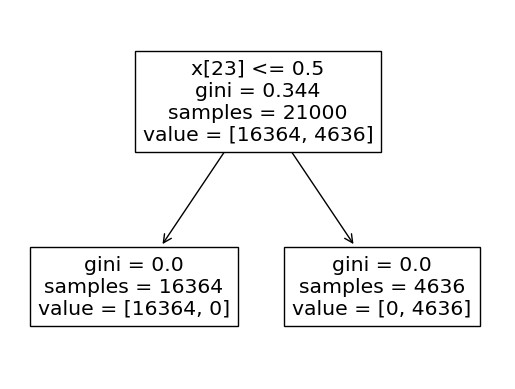

In [ ]:
from sklearn.tree import plot_tree
plot_tree(de_tree)

In [ ]:
de_tree_pred = de_tree.predict(x_test)
clf_report_de_tree = pd.DataFrame(classification_report(y_test, de_tree_pred, output_dict=True))
clf_report_de_tree
clf_report_de_tree

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,7000.0,2000.0,1.0,9000.0,9000.0


In [ ]:
print(confusion_matrix(y_test, de_tree_pred))

[[7000    0]
 [   0 2000]]


In [ ]:
accuracy_score(y_test, de_tree_pred)

1.0

NAVIE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
nb_pred = nb.predict(x_test)
clf_report_nb = pd.DataFrame(classification_report(y_test, nb_pred, output_dict=True))
clf_report_nb

,0,1,accuracy,macro avg,weighted avg
precision,0.910206,0.260988,0.408,0.585597,0.765935
recall,0.265000,0.908500,0.408,0.586750,0.408000
f1-score,0.410489,0.405490,0.408,0.407989,0.409378
support,7000.000000,2000.000000,0.408,9000.000000,9000.000000


In [ ]:
print(confusion_matrix(y_test, nb_pred))

[[1855 5145]
 [ 183 1817]]


In [ ]:
accuracy_score(y_test, nb_pred)

0.408

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class="ovr")
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pred = lr.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.777864,1.0000,0.777889,0.888932,0.827228
recall,1.000000,0.0005,0.777889,0.500250,0.777889
f1-score,0.875055,0.0010,0.777889,0.438027,0.680820
support,7000.000000,2000.0000,0.777889,9000.000000,9000.000000


In [ ]:
print(confusion_matrix(y_test, pred))

[[7000    0]
 [1999    1]]


In [ ]:
accuracy_score(y_test, pred)

0.7778888888888889

SVM:

ACCURACY SCORE:0.7778888888888889

RANDOM FOREST:

ACCURACY SCORE:1.0

DECISION TREE:

ACCURACY SCORE:1.0

NAVIE BAYES:

ACCURACY SCORE:0.408

LOGISTIC REGRESSION:

ACCURACY SCORE:0.7778888888888889

SO FROM ALL THESE ML ALGORITHMS USING RANDOM FOREST AND DECISION TREE CLASSIFIERS WE GET BEST ACCURACY.